In [1]:
import os
import pandas as pd
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
# 라벨 인코딩을 위한 사전 생성 (훈련 시 사용한 것과 동일해야 함)
# 여기에 실제 라벨을 사용하여 매핑을 설정해야 합니다.
label_mapping = {
    'LESS': 0,
    'HOODED': 1,
    'NEAT': 2,
    'SHIRTS': 3,
    'SPORTS': 4,
    'SWEAT': 5,
    'POLO': 6,
    'T_SHIRTS': 7
}

In [4]:
# 모델 초기화
model = models.resnext50_32x4d(pretrained=False)
model.fc = nn.Linear(model.fc.in_features, len(label_mapping))  # 클래스 수에 맞게 수정
model.load_state_dict(torch.load('resnext_model_tops_small.pth'))  # 학습된 가중치 파일 경로
model.eval()  # 평가 모드로 설정


C:\Users\User\AppData\Local\Temp\ipykernel_17404\4248415511.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('resnext_model_tops_small.pt

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [5]:
# 장치 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1

In [6]:
# 이미지 전처리 변환
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

In [7]:
def predict(image_path):
    # 이미지 로드 및 전처리
    image = Image.open(image_path).convert('RGB')
    image_transformed = transform(image).unsqueeze(0)  # 배치 차원 추가

    # 추론
    with torch.no_grad():
        image_transformed = image_transformed.to(device)
        outputs = model(image_transformed)
        _, predicted = torch.max(outputs, 1)  # 가장 높은 확률의 클래스 인덱스 추출

    # 라벨 매핑을 사용하여 예측된 라벨 가져오기
    predicted_label = list(label_mapping.keys())[list(label_mapping.values()).index(predicted.item())]
    
    return predicted_label, image  # 예측된 라벨과 원본 이미지 반환

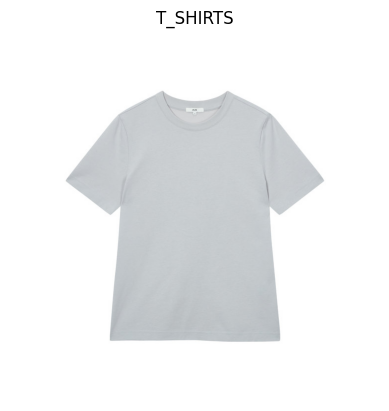

예측된 카테고리: T_SHIRTS


In [12]:
# 예측할 이미지 경로
image_path = "D:/minkwan/졸업작품/coordikitty-ML-DL/test_image/티셔츠.jpg"  # 예시 이미지 경로
predicted_category, original_image = predict(image_path)

# 이미지 출력
plt.imshow(original_image)
plt.axis('off')  # 축 숨기기
plt.title(predicted_category)  # 예측된 카테고리 제목 추가
plt.show()

print(f"예측된 카테고리: {predicted_category}")